In [77]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from app.classifier import EnsembleAllNumeric, normalize, get_voting_classifier
from app.main import normalize
from app.training import get_undersample_df
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("data/processed_data.csv")
df = get_undersample_df(df)
df = normalize(df)

val_df = pd.read_csv("data/validation_data_processed.csv")
val_df = normalize(val_df)

val_add_df = pd.read_csv("data/validation_additional_processed_data.csv")
val_add_df = normalize(val_add_df)

_ = df.pop("readme")
_ = val_df.pop("readme")
_ = val_add_df.pop("readme")

y = df.pop("label")
y_val = val_df.pop("label")
y_val_add = val_add_df.pop("label")

#_ = df.pop("Unnamed: 0")
_ = df.pop("index")
_ = val_df.pop("Unnamed: 0")
_ = val_add_df.pop("Unnamed: 0")

val_df = ensemble_clf.transform(val_df)
val_df = ensemble_clf.keep_useful_features(val_df, useful)
val_add_df = ensemble_clf.transform(val_add_df)
val_add_df = ensemble_clf.keep_useful_features(val_add_df, useful)

ensemble_clf = EnsembleAllNumeric()
ensemble_clf.fit(df, y)
df = ensemble_clf.transform(df)
useful = ensemble_clf.useful_features
from sklearn.ensemble import RandomForestClassifier
nb = RandomForestClassifier()
rfe = RFE(estimator=nb, n_features_to_select=120, step=1)
rfe.fit(df, y)

print df.columns[rfe.support_]
print rfe.ranking_[rfe.support_]

print rfe.score(val_df, y_val)
print rfe.score(val_add_df, y_val_add)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index([              u'watchers',       u'mentionableUsers',
         u'closed_pull_requests',          u'closed_issues',
                  u'open_issues',                  u'forks',
         u'merged_pull_requests',             u'stargazers',
           u'open_pull_requests',               u'projects',
       ...
        u'description_solutions',     u'description_source',
              u'description_the',       u'description_this',
            u'description_tools',   u'description_training',
        u'description_tutorials', u'description_university',
            u'description_video',        u'description_web'],
      dtype='object', length=120)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


ValueError: X has a different shape than during fitting.

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df, y)
print model.feature_importances_
print model.score(val_df, y_val)
print model.score(val_add_df, y_val_add)

[  7.52175446e-03   1.19605493e-02   1.22449032e-02 ...,   0.00000000e+00
   9.33706816e-06   0.00000000e+00]


ValueError: Number of features of the model must match the input. Model n_features is 1991 and input n_features is 1984 

1991


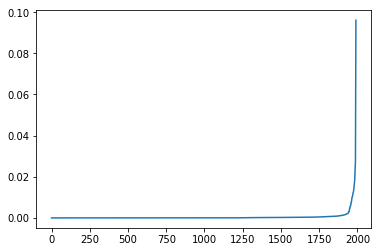

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
l = list(model.feature_importances_)
l = sorted(l)
plt.plot(l)
print len(l)
plt.show()

In [80]:
zipped = zip(useful, model.feature_importances_)

In [82]:
zipped.sort(key=lambda x: x[1], reverse=True)
[x[0] for x in zipped[:85]]

['isOwnerHomepage',
 u'description_homework',
 'hasHomepage',
 u'description_materials',
 u'description_course',
 u'description_curated',
 'stargazers',
 u'description_list',
 u'description_lecture',
 'hasTravisConfig',
 'open_issues',
 'hasLicense',
 u'description_for',
 u'description_solutions',
 'commitsCount',
 'LANGUAGE_Python',
 'hasCiConfig',
 u'description_solution',
 'closed_pull_requests',
 'mentionableUsers',
 'forks',
 'tagsCount',
 u'description_material',
 'merged_pull_requests',
 'branchesCount',
 u'description_awesome',
 u'description_data',
 u'description_resources',
 'releasesCount',
 u'description_assignments',
 'size',
 'watchers',
 'closed_issues',
 u'description_framework',
 'open_pull_requests',
 u'description_language',
 u'description_and',
 u'description_tools',
 u'description_assignment',
 u'description_libraries',
 u'description_class',
 u'description_from',
 u'description_codes',
 'LANGUAGE_Haskell',
 u'description_collection',
 'LANGUAGE_Java',
 u'descripti

In [ ]:
clfs = [clf[1] for clf in get_voting_classifier().estimators]
clfs.append(ensemble_clf)

loops = 10
for clf in clfs:
    val_score = 0
    val_add_score = 0
    print clf.__class__
    for i in range(loops):
        clf.fit(df, y)
        val_score += clf.score(val_df, y_val)
        val_add_score += clf.score(val_add_df, y_val_add)
    print "Validation: " + str(val_score/loops)
    print "Additional: " + str(val_add_score/loops)

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(clf.clf, out_file='tree.dot', class_names=clf.clf.classes_, feature_names=clf.useful_features) 

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

In [ ]:
!dot -Tpng tree.dot -o tree.png 

In [ ]:
!eog tree.png

In [18]:
df.loc[df["branchesCount"] == 0]

,repository,owner,name,watchers,mentionableUsers,closed_pull_requests,closed_issues,open_issues,forks,merged_pull_requests,...,LANGUAGE_ANTLR,LANGUAGE_Scilab,LANGUAGE_Module Management System,LANGUAGE_SAS,LANGUAGE_Nemerle,LANGUAGE_Csound Document,LANGUAGE_Agda,LANGUAGE_XQuery,LANGUAGE_Ada,LANGUAGE_Arduino
69,tekkub/tekkub.github.com,tekkub,tekkub.github.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,hacke2/hacke2.github.,hacke2,hacke2.github.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327,cdwanze/cdwanze.github.io,cdwanze,cdwanze.github.io,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,datasets/datasets.github.com,datasets,datasets.github.com,6.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593,meebert/Dynamic-Programming-EggDrop,meebert,Dynamic-Programming-EggDrop,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
613,myhomeworkhelp/Accounts-Assignment-Help,myhomeworkhelp,Accounts-Assignment-Help,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634,theironyard-rails-atl/jamesdab,theironyard-rails-atl,jamesdab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1019,XuezhengMa/Math,XuezhengMa,Math,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,studentalpha/PRML-solutions,studentalpha,PRML-solutions,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1044,bachkiko/SoftUni,bachkiko,SoftUni,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
